# <center><b>PROYEK SAINS DATA UJI PYCARET<b></center>

Kali ini saya mencoba untuk melakukan uji coba library pycaret untuk mencari model dengan akurasi terbaik pada data water quality yang saya miliki.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/folder data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/folder data


In [ ]:
import pandas as pd

In [ ]:
pip install pycaret

In [ ]:
air_df = pd.read_excel('waterQuality1.xlsx')
air_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
from pycaret.classification import *
s = setup(air_df, target = 'is_safe', session_id = 123)

,Description,Value
0,Session id,123
1,Target,is_safe
2,Target type,Binary
3,Original data shape,"(7999, 21)"
4,Transformed data shape,"(7999, 21)"
5,Transformed train set shape,"(5599, 21)"
6,Transformed test set shape,"(2400, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(air_df, target = 'is_safe', session_id = 123)

,Description,Value
0,Session id,123
1,Target,is_safe
2,Target type,Binary
3,Original data shape,"(7999, 21)"
4,Transformed data shape,"(7999, 21)"
5,Transformed train set shape,"(5599, 21)"
6,Transformed test set shape,"(2400, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9696,0.9886,0.8200,0.9059,0.8602,0.8432,0.8449,0.2470
lightgbm,Light Gradient Boosting Machine,0.9689,0.9898,0.8200,0.8994,0.8572,0.8398,0.8413,0.9730
gbc,Gradient Boosting Classifier,0.9570,0.9811,0.7057,0.8946,0.7880,0.7645,0.7717,1.1550
rf,Random Forest Classifier,0.9568,0.9760,0.6666,0.9363,0.7771,0.7540,0.7683,0.5780
dt,Decision Tree Classifier,0.9505,0.8854,0.8011,0.7737,0.7866,0.7587,0.7592,0.0740
et,Extra Trees Classifier,0.9327,0.9524,0.4758,0.8813,0.6158,0.5826,0.6171,0.4200
ada,Ada Boost Classifier,0.9309,0.9353,0.5538,0.7770,0.6449,0.6080,0.6196,0.3900
lr,Logistic Regression,0.9014,0.8507,0.2833,0.6623,0.3938,0.3498,0.3887,0.9380
lda,Linear Discriminant Analysis,0.8996,0.8547,0.4164,0.5869,0.4851,0.4315,0.4403,0.0280
ridge,Ridge Classifier,0.8962,0.0000,0.1580,0.7209,0.2580,0.2256,0.3037,0.0350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9696,0.9886,0.8200,0.9059,0.8602,0.8432,0.8449,0.1510
lightgbm,Light Gradient Boosting Machine,0.9689,0.9898,0.8200,0.8994,0.8572,0.8398,0.8413,1.1440
gbc,Gradient Boosting Classifier,0.9570,0.9811,0.7057,0.8946,0.7880,0.7645,0.7717,1.3010
rf,Random Forest Classifier,0.9568,0.9760,0.6666,0.9363,0.7771,0.7540,0.7683,0.7130
dt,Decision Tree Classifier,0.9505,0.8854,0.8011,0.7737,0.7866,0.7587,0.7592,0.0630
et,Extra Trees Classifier,0.9327,0.9524,0.4758,0.8813,0.6158,0.5826,0.6171,0.3030
ada,Ada Boost Classifier,0.9309,0.9353,0.5538,0.7770,0.6449,0.6080,0.6196,0.2600
lr,Logistic Regression,0.9014,0.8507,0.2833,0.6623,0.3938,0.3498,0.3887,0.1240
lda,Linear Discriminant Analysis,0.8996,0.8547,0.4164,0.5869,0.4851,0.4315,0.4403,0.0290
ridge,Ridge Classifier,0.8962,0.0000,0.1580,0.7209,0.2580,0.2256,0.3037,0.0250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


In [ ]:
# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

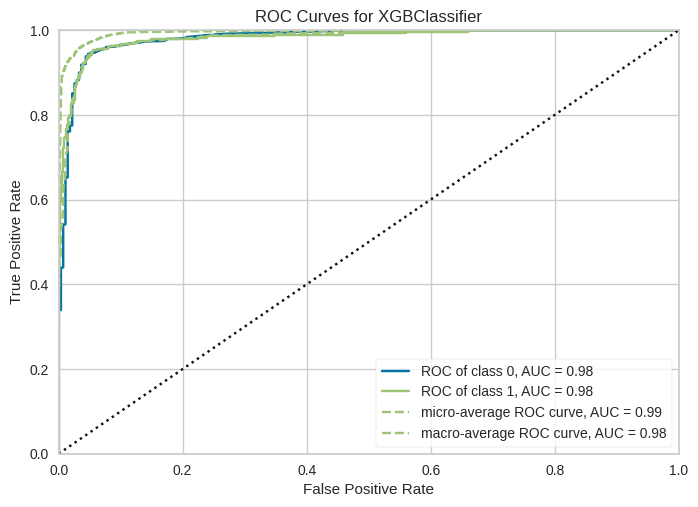

In [ ]:
# OOP API
s.plot_model(best, plot = 'auc')

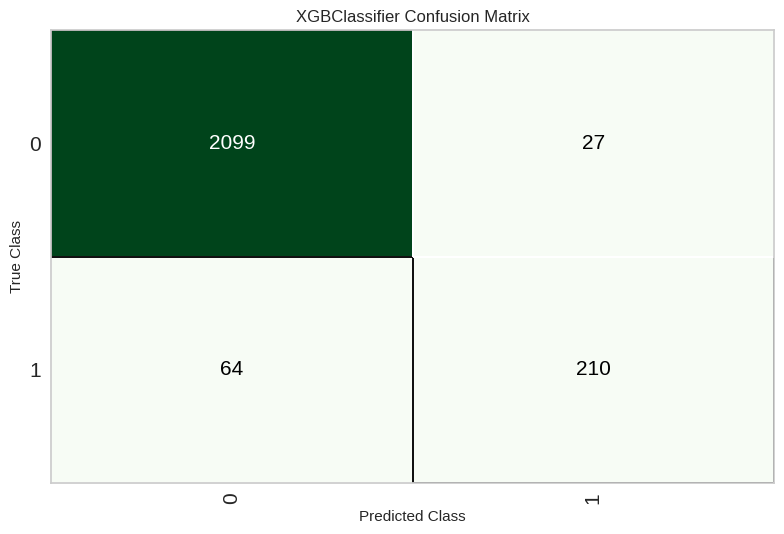

In [ ]:
# OOP API
s.plot_model(best, plot = 'confusion_matrix')

In [ ]:
# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9621,0.9816,0.7664,0.8861,0.8219,0.8008,0.8035


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe,prediction_label,prediction_score
1660,3.80,29.139999,0.110,2.93,0.100,3.89,0.41,1.50,1.01,0.61,...,2.10,0.003,29.520000,0.45,0.06,0.41,0.05,0,0,0.9999
126,2.12,23.580000,0.001,0.57,0.003,4.30,0.82,1.57,0.43,0.04,...,1.97,0.005,0.910000,5.11,0.03,0.20,0.03,1,1,0.9983
97,2.85,23.020000,0.030,2.24,0.004,0.46,0.02,1.77,0.62,0.14,...,1.19,0.004,27.850000,7.60,0.01,0.45,0.05,0,0,0.5657
2602,0.07,11.620000,0.020,1.18,0.005,4.96,0.46,0.40,0.79,0.43,...,1.01,0.006,44.049999,5.75,0.04,0.35,0.02,0,0,0.9993
774,2.25,7.800000,0.030,0.77,0.001,1.33,0.16,0.99,0.08,0.00,...,1.91,0.009,49.830002,5.84,0.05,0.41,0.07,0,0,0.9951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,0.09,22.049999,0.020,0.89,0.010,0.02,0.03,0.00,0.48,0.00,...,0.68,0.004,7.400000,0.52,0.10,0.09,0.02,0,0,0.9999
5467,0.10,2.970000,0.090,2.21,0.030,0.12,0.02,1.88,1.34,0.00,...,0.45,0.009,6.590000,0.47,0.08,0.08,0.06,0,0,0.9995
3882,0.19,9.390000,0.860,3.83,0.110,0.54,0.08,0.09,0.39,0.41,...,1.24,0.005,15.230000,4.07,0.02,0.41,0.06,0,0,0.9999
1706,1.45,2.240000,0.660,2.63,0.010,4.45,0.02,0.48,0.05,0.22,...,1.12,0.010,40.730000,4.27,0.09,0.18,0.03,0,0,0.9996


In [ ]:
# OOP API
predictions = s.predict_model(best, data=air_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9886,0.9960,0.9299,0.9692,0.9491,0.9427,0.9430


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe,prediction_label,prediction_score
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.007,37.750000,6.78,0.08,0.34,0.02,1,1,0.7742
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.003,32.259998,3.21,0.08,0.27,0.05,1,1,0.7028
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,1.11,0.006,50.279999,7.07,0.07,0.44,0.01,0,0,0.9998
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.004,9.120000,1.72,0.02,0.45,0.05,1,1,0.9996
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.003,16.900000,2.41,0.02,0.06,0.02,1,1,0.9999


In [ ]:
# OOP API
predictions = s.predict_model(best, data=air_df, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9886,0.9960,0.9299,0.9692,0.9491,0.9427,0.9430


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,mercury,perchlorate,radium,selenium,silver,uranium,is_safe,prediction_label,prediction_score_0,prediction_score_1
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.007,37.750000,6.78,0.08,0.34,0.02,1,1,0.2258,0.7742
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.003,32.259998,3.21,0.08,0.27,0.05,1,1,0.2972,0.7028
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.006,50.279999,7.07,0.07,0.44,0.01,0,0,0.9998,0.0002
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.004,9.120000,1.72,0.02,0.45,0.05,1,1,0.0004,0.9996
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.003,16.900000,2.41,0.02,0.06,0.02,1,1,0.0001,0.9999


In [ ]:
# OOP API
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['aluminium', 'ammonia', 'arsenic',
                                              'barium', 'cadmium', 'chloramine',
                                              'chromium', 'copper', 'flouride',
                                              'bacteria', 'viruses', 'lead',
                                              'nitrates', 'nitrites', 'mercury',
                                              'perchlorate', 'radium',
                                              'selenium', 'silver', 'uranium'],
                                     transformer=SimpleImputer(add_indi...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_ca

In [ ]:
# OOP API
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['aluminium', 'ammonia', 'arsenic',
                                             'barium', 'cadmium', 'chloramine',
                                             'chromium', 'copper', 'flouride',
                                             'bacteria', 'viruses', 'lead',
                                             'nitrates', 'nitrites', 'mercury',
                                             'perchlorate', 'radium',
                                             'selenium', 'silver', 'uranium'],
                                    transformer=SimpleImput...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None